# Import Libraries

In [1]:
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
import datetime as dt
from scipy.stats import mstats
from xgboost import XGBRegressor

# Load Data

In [2]:
df = pd.read_csv("train.csv")
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


# Data Preprocessing

In [3]:
df.duplicated().sum()

313

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df[df['Levy'] == '-']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.0,Automatic,Front,04-May,Left wheel,Blue,4
19224,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19226,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [7]:
df['Levy'] = df['Levy'].replace('-', np.nan)
df['Levy'] = df['Levy'].astype(float)

In [8]:
df['Levy'] = df['Levy'].fillna(df['Levy'].median())

In [9]:
df['Mileage'] = df['Mileage'].apply(lambda x: x.split(' ')[0])

In [10]:
df['Mileage'] = df['Mileage'].astype(int)

In [11]:
df['Turbo'] = df['Engine volume'].str.contains('Turbo')

In [12]:
df['Engine volume'] = df['Engine volume'].apply(lambda x: x.split(' ')[0])

In [13]:
df['Engine volume'] = df['Engine volume'].astype(float)

In [14]:
df['Doors'].value_counts()

Doors
04-May    18032
02-Mar      768
>5          124
Name: count, dtype: int64

In [15]:
df['Doors'] = df['Doors'].replace('04-May', '4')
df['Doors'] = df['Doors'].replace('02-Mar', '2')
df['Doors'] = df['Doors'].replace('>5', '5')

In [16]:
df['Doors'] = df['Doors'].astype(int)

In [17]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower()

In [18]:
currt_time = dt.datetime.now()
df['Prod. year'] = currt_time.year - df['Prod. year'] 

In [19]:
dummies = pd.get_dummies(df[['Drive wheels','Gear box type', 'Fuel type']], prefix=['Drive', 'Gear', 'Fuel'])
df = pd.concat([df, dummies], axis=1)
df.drop(['Drive wheels','Gear box type', 'Fuel type'], axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   18924 non-null  int64  
 1   Price                18924 non-null  int64  
 2   Levy                 18924 non-null  float64
 3   Manufacturer         18924 non-null  object 
 4   Model                18924 non-null  object 
 5   Prod. year           18924 non-null  int64  
 6   Category             18924 non-null  object 
 7   Leather interior     18924 non-null  object 
 8   Engine volume        18924 non-null  float64
 9   Mileage              18924 non-null  int32  
 10  Cylinders            18924 non-null  float64
 11  Doors                18924 non-null  int32  
 12  Wheel                18924 non-null  object 
 13  Color                18924 non-null  object 
 14  Airbags              18924 non-null  int64  
 15  Turbo                18924 non-null  bool

In [21]:
df.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,868.498890,14.085764,2.306251,1.555373e+06,4.580216,3.925386,6.568379
std,9.375468e+05,1.921356e+05,391.400489,5.665749,0.877591,4.880221e+07,1.200223,0.404138,4.322323
min,2.074688e+07,1.000000e+00,87.000000,5.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,4.569501e+07,5.331000e+03,730.000000,10.000000,1.800000,7.019575e+04,4.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,781.000000,13.000000,2.000000,1.264000e+05,4.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,917.000000,16.000000,2.500000,1.891198e+05,4.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,86.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000


# Boxplot & Correlation Matrix

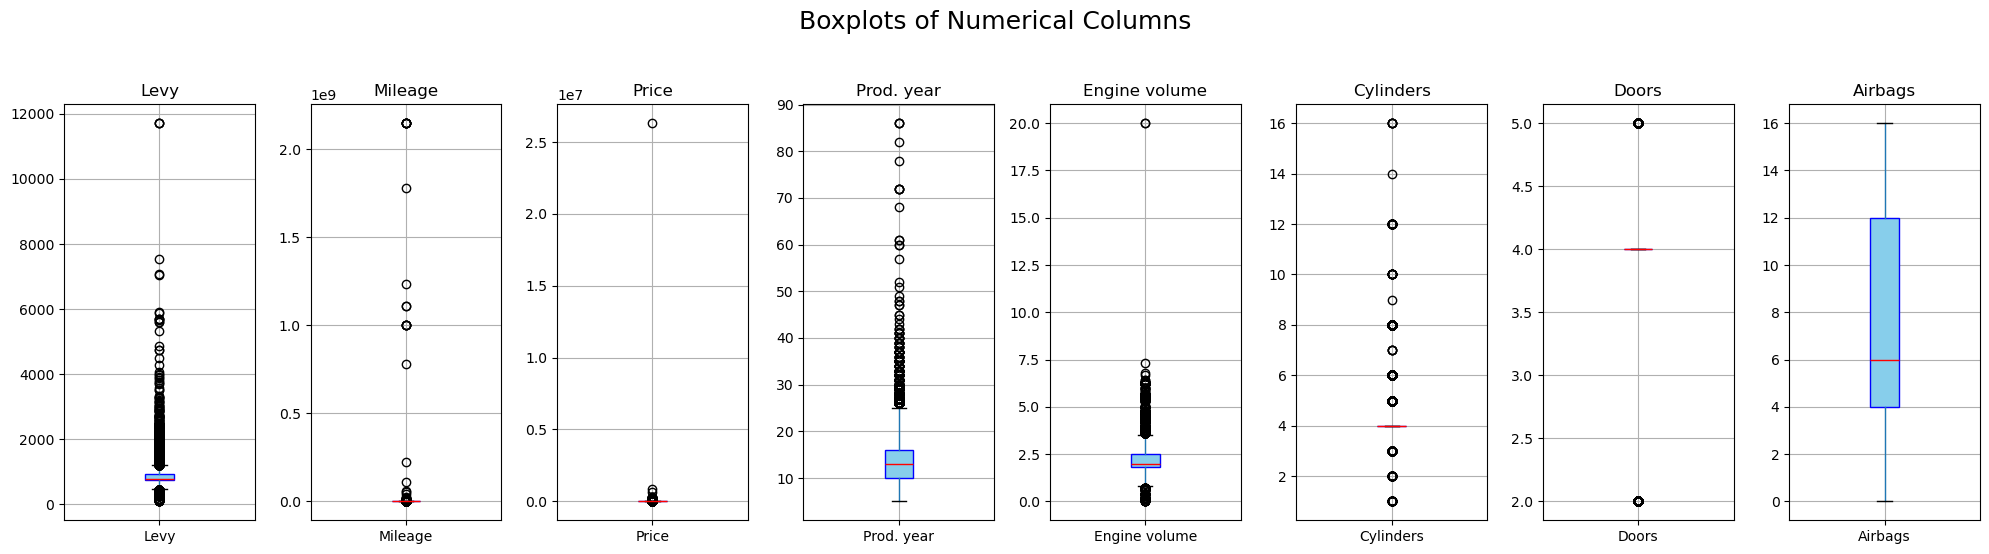

In [22]:
numerical_columns = ['Levy', 'Mileage', 'Price', 'Prod. year', 'Engine volume', 'Cylinders', 'Doors', 'Airbags']
plt.figure(figsize=(20, 10))
plt.suptitle('Boxplots of Numerical Columns', fontsize=18)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 8, i)
    df.boxplot(column=col, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'),
                 medianprops=dict(color='red'))
    plt.title(col, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

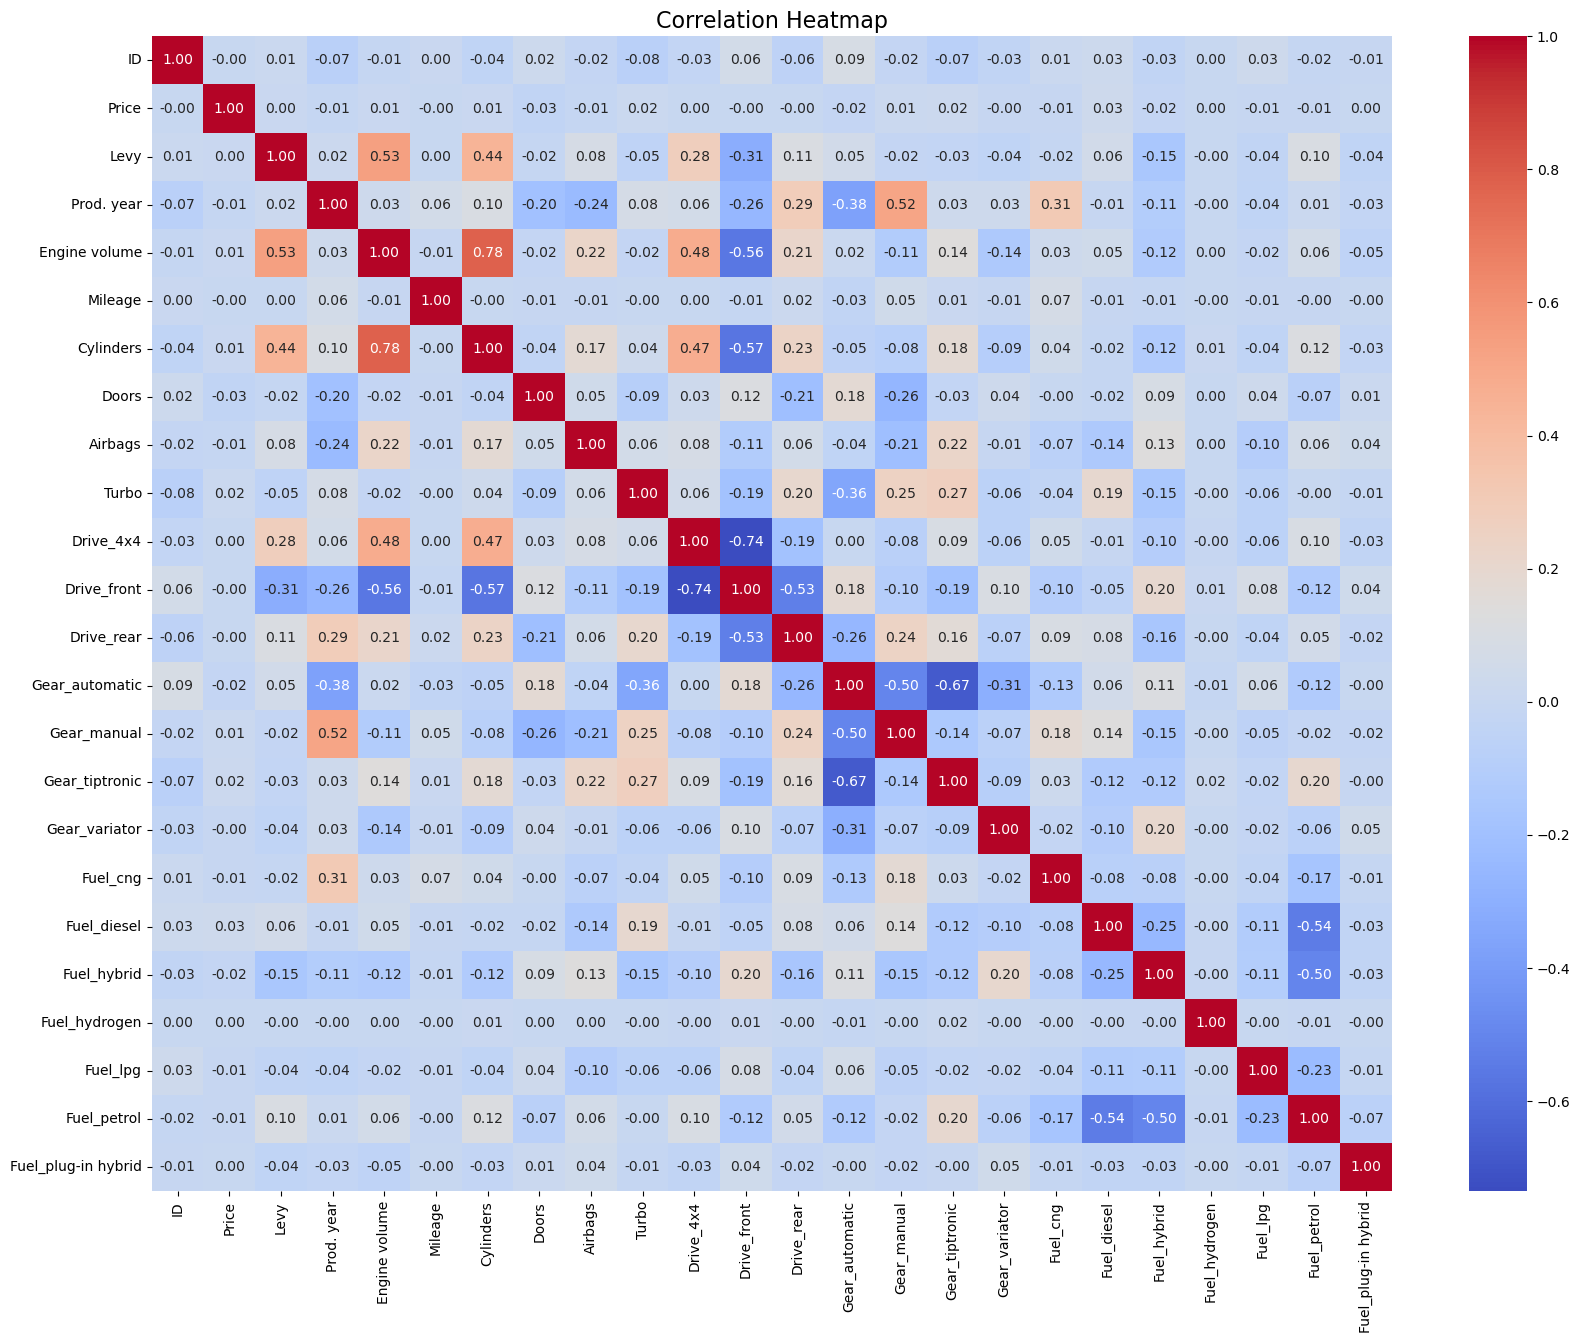

In [23]:
corr_columns = df.select_dtypes(include=['number', 'bool'])
correlation_matrix = corr_columns.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Handle Outliers 

In [24]:
print(min(df.Price))
print(max(df.Price))

1
26307500


In [25]:
df = df[(df["Price"] >= 1000) & (df["Price"] <= 100000)]

In [26]:
df = df[df['Levy'] < df['Price']]

In [27]:
df['Levy_Percentage'] = (df['Levy'] / df['Price']) * 100

In [28]:
df = df[df['Levy_Percentage'] <= 15]

In [29]:
df = df[df['Engine volume'] > 0]

In [30]:
for col in numerical_columns[0:5]:
    df.loc[:, col] = mstats.winsorize(df[col], limits=[0.01, 0.04])

In [31]:
df.shape

(13849, 31)

# Boxplot & Correlation Matrix After Handling Outliers

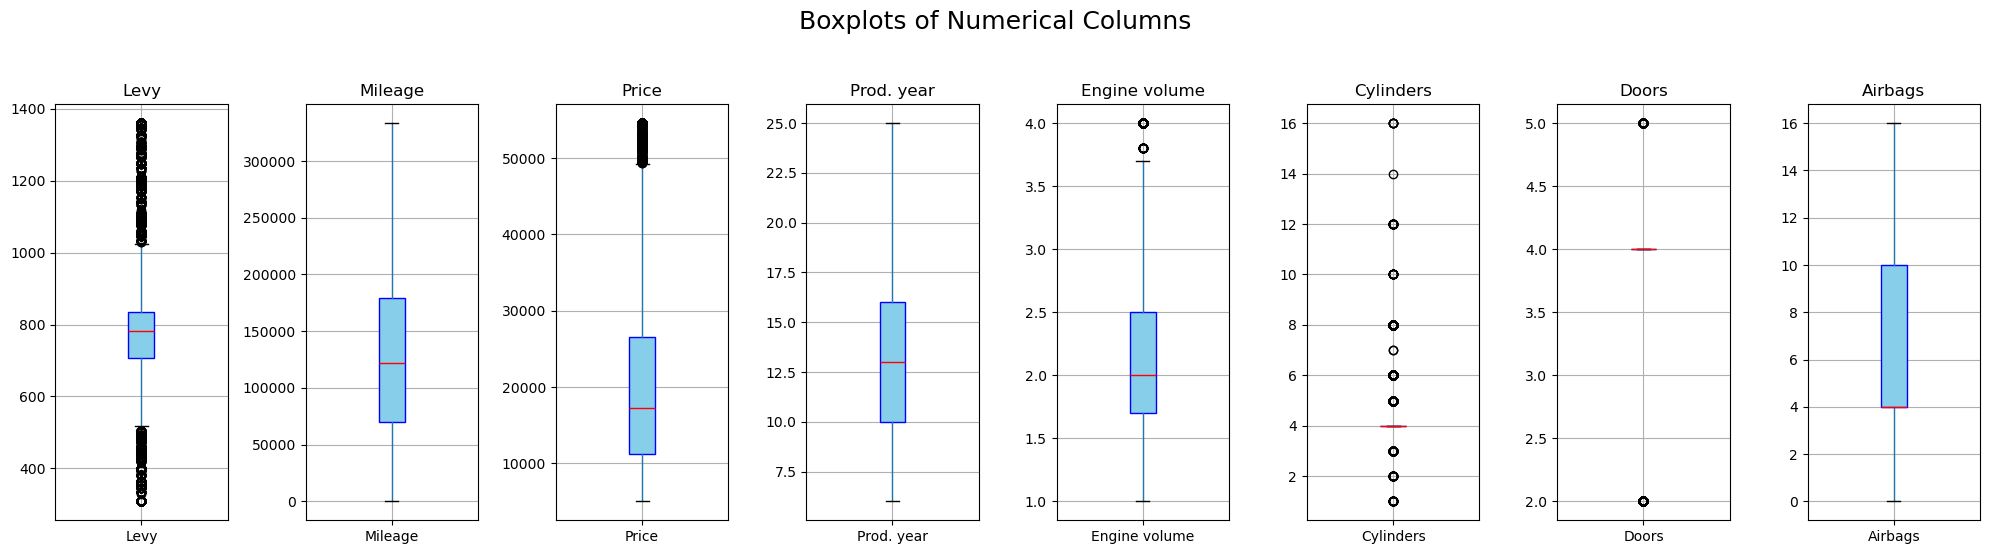

In [32]:
plt.figure(figsize=(20, 10))
plt.suptitle('Boxplots of Numerical Columns', fontsize=18)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 8, i)
    df.boxplot(column=col, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'),
                 medianprops=dict(color='red'))
    plt.title(col, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

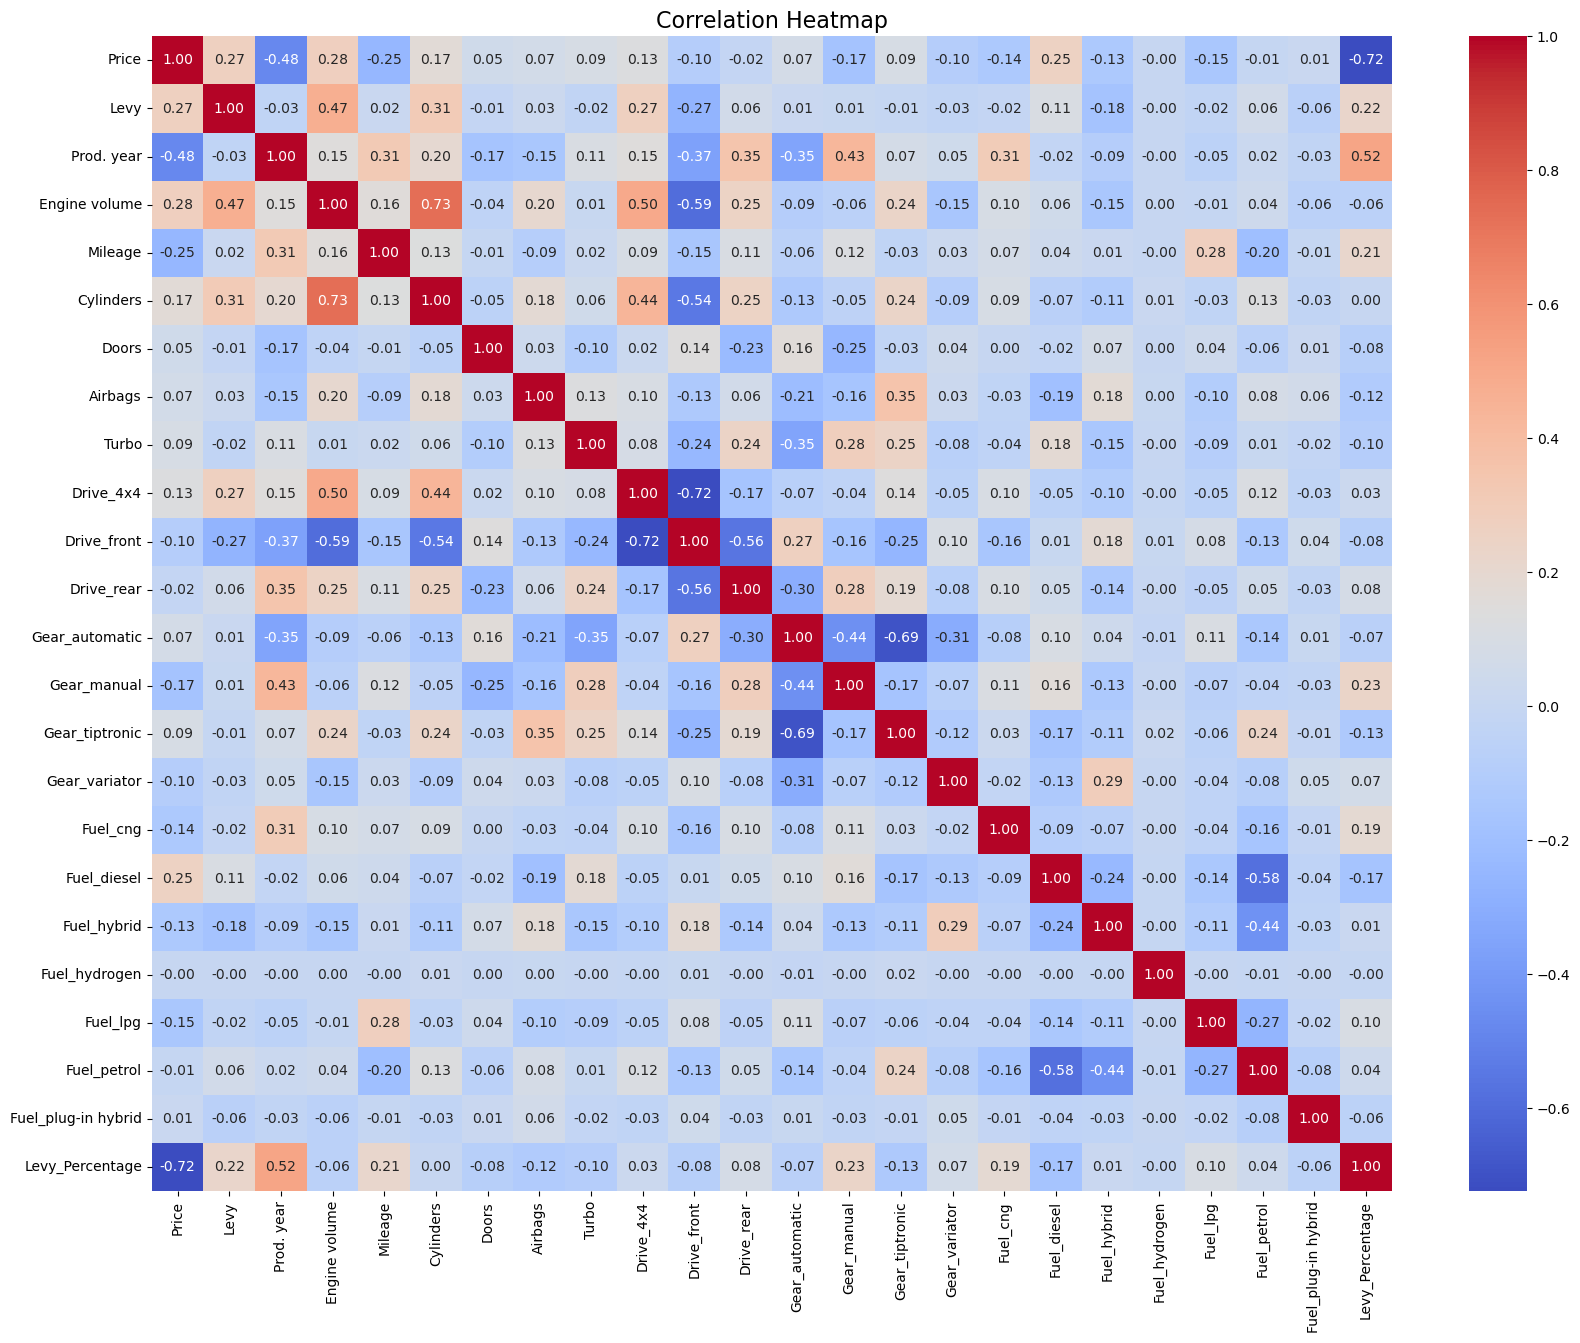

In [33]:
corr_columns = df.select_dtypes(include=['number', 'bool']).drop(['ID'], axis=1)
non_zero_var_columns = corr_columns.loc[:, corr_columns.var() > 0]
correlation_matrix = non_zero_var_columns.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Label Encoder

In [34]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13849 entries, 0 to 19234
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   13849 non-null  int64  
 1   Price                13849 non-null  int64  
 2   Levy                 13849 non-null  float64
 3   Manufacturer         13849 non-null  int32  
 4   Model                13849 non-null  int32  
 5   Prod. year           13849 non-null  int64  
 6   Category             13849 non-null  int32  
 7   Leather interior     13849 non-null  int32  
 8   Engine volume        13849 non-null  float64
 9   Mileage              13849 non-null  int32  
 10  Cylinders            13849 non-null  float64
 11  Doors                13849 non-null  int32  
 12  Wheel                13849 non-null  int32  
 13  Color                13849 non-null  int32  
 14  Airbags              13849 non-null  int64  
 15  Turbo                13849 non-null  bool

# Split Data Into Train & Test

In [36]:
X = df.drop(['Price', 'ID', 'Levy_Percentage'], axis=1)
y = df['Price']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Standard Scaler

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
print(f"Shape of training inputs: {X_train.shape}")
print(f"Shape of testing inputs: {X_test.shape}")

Shape of training inputs: (11079, 28)
Shape of testing inputs: (2770, 28)


# Linear Regression

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 80504912.27857153
Mean Absolute Error (MAE): 6793.55662106148
R-squared: 0.5146020524488859


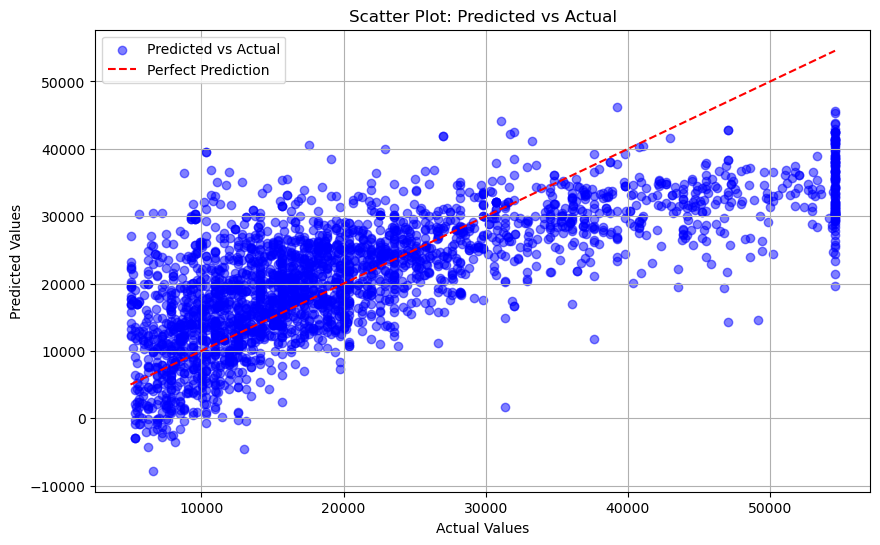

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

# KNN Regressor

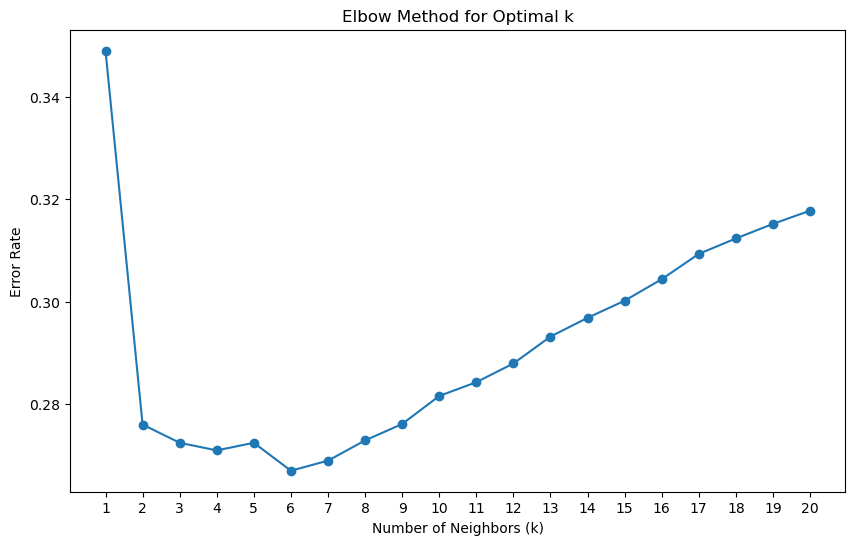

In [43]:
errors = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    error = 1 - r_squared
    errors.append(error)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), errors, marker='o')
plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal k')
plt.show()

In [44]:
knn_regressor = KNeighborsRegressor(n_neighbors=6)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 44292274.683945045
Mean Absolute Error (MAE): 4375.633152827919
R-squared: 0.7329432625233763


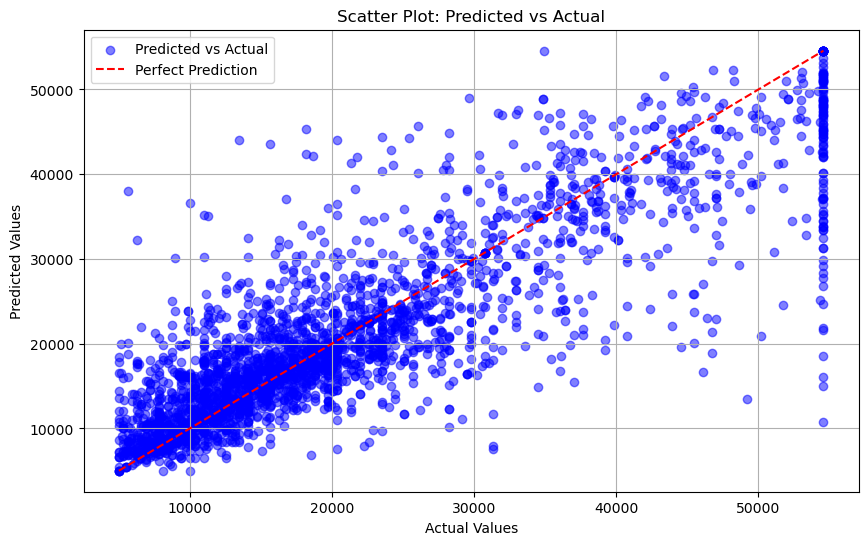

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

# Xgboost Regressor

In [46]:
model = XGBRegressor (
    n_estimators=1200,
    max_depth=10,
    learning_rate=0.01,
    min_child_weight=1,
    subsample=0.6,
    colsample_bytree=0.8,
    reg_lambda=0.3,
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 24318060.757513564
Mean Absolute Error (MAE): 3179.613847620995
R-squared: 0.8533761922592356


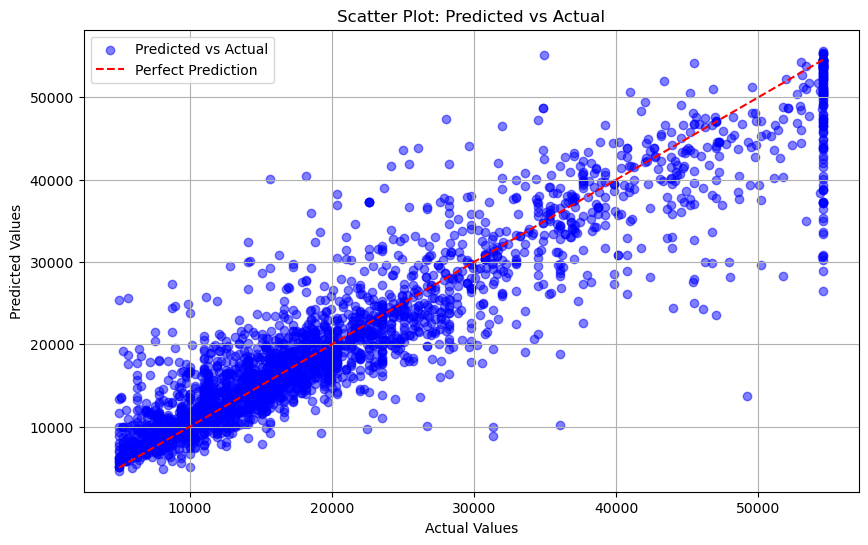

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()